In [70]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from PIL import Image
from qwen import Qwen2VLForAttnExtraction

model = Qwen2VLForAttnExtraction()


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [81]:
attn = model.extract_attention(
    "How many yellow objects are there in the image?",
    Image.open("img4.png"),
    # [],
    attn_type="contrastive",
    single_token_generation=False,
    contrast_layers=(14, 6),
)


In [82]:
attn[0].shape


torch.Size([11, 11])

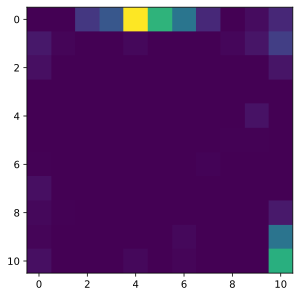

In [83]:
from einops import rearrange, reduce, repeat
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

# attn_map = reduce(attn, "l () h n m -> n m", "mean")
# plt.imshow(attn_map[1:, 1:])
plt.imshow(attn[0])
